In [1]:
#virtual environment
#python3 -m venv ml-env
#Set-ExecutionPolicy Unrestricted -Scope Process 
#.\ml-env\Scripts\activate
#pip install -U scikit-learn


In [39]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#iris df
iris_data=load_iris(as_frame=True)
iris_df=iris_data.frame

In [4]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris_data

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [6]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
X=iris_df[['petal length (cm)', 'petal width (cm)']].values
y=(iris_data['target'] == 0).values #0 -> iris setosa, 1 -> iris versicolor, 2 -> iris virginica

In [9]:
pef_clf=Perceptron(random_state=42)
pef_clf.fit(X,y)

Perceptron(random_state=42)

In [10]:
X_new=[[2,0.5],[3,1],[4,1.5]]
y_pred=pef_clf.predict(X_new)
y_pred

array([ True, False, False])

# MLP REGRESSION

In [11]:
# Need to standardize the input features otherwise gradient descent doesn't converge well


In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline


In [13]:
housing=fetch_california_housing()
housing


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [14]:
X_train_full, X_test, y_train_full, y_test=train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid=train_test_split(X_train_full, y_train_full, random_state=42)

In [18]:
#mlp_reg
mlp_reg=MLPRegressor(hidden_layer_sizes=[50,50,50,50],random_state=42)
pipeline=make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred=pipeline.predict(X_valid)
rmse=mean_squared_error(y_valid, y_pred)
rmse

0.560223464527582

# KERAS

In [19]:
import tensorflow as tf

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test)=fashion_mnist
X_train,y_train=X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid=X_train_full[5000:], y_train_full[5000:]


In [45]:
X_train,X_valid,X_test=X_train/255.0, X_valid/255.0, X_test/255.0

In [62]:
#class names
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

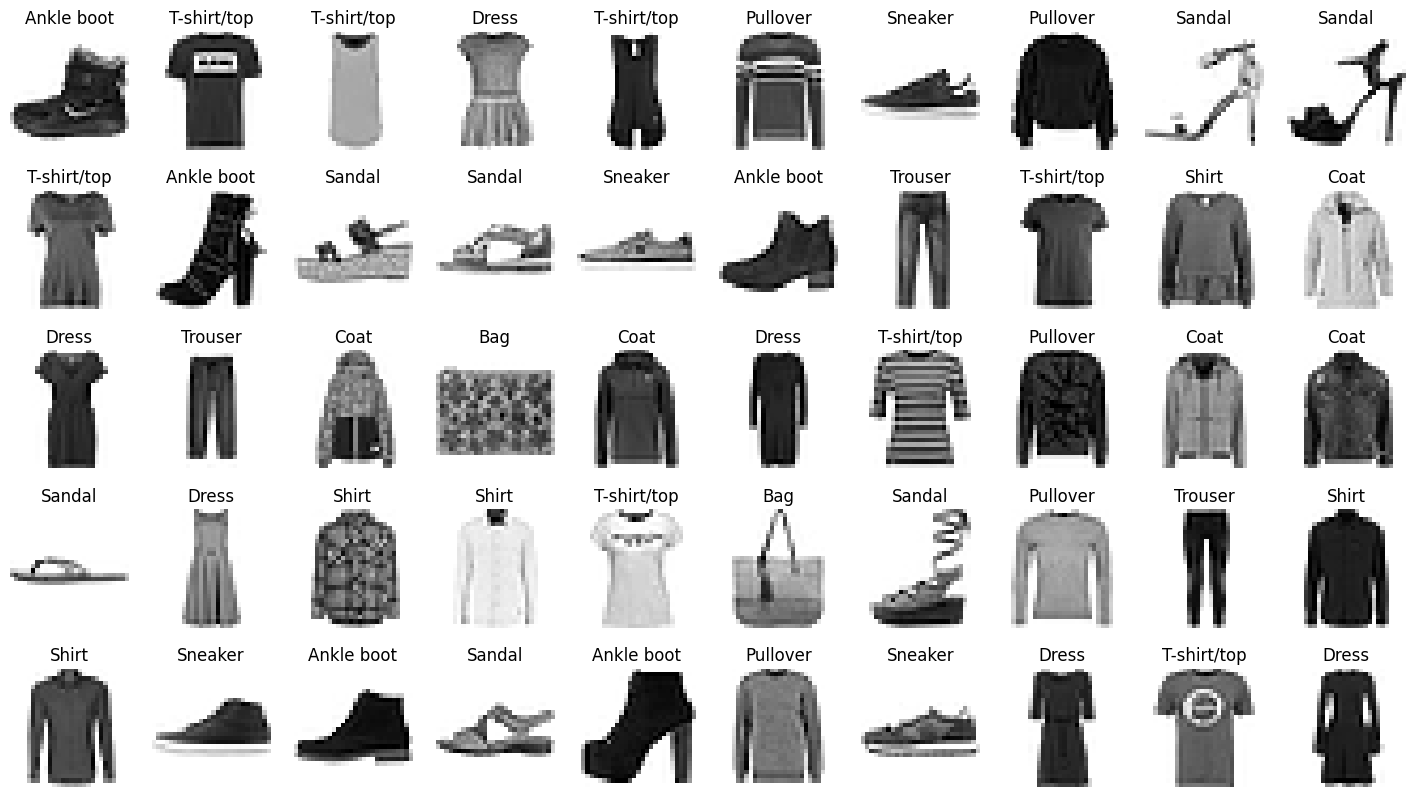

In [77]:
plt.figure(figsize=(18,10))
total_images=50
for i in range(total_images):
    plt.subplot(5,10,i+1)
    plt.imshow(X_train[i], cmap='binary')
    plt.title(class_names[y_train[i]])
    plt.axis('off')

In [80]:
#hidden layers
tf.random.set_seed(42)
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [81]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])